In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [15]:
df = pd.read_csv('horse.csv')
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [16]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [17]:
categorical = df.select_dtypes(include=['object','category'])
numerical = df.select_dtypes(include=['int','float'])

for x in categorical:
    df[x].fillna(df[x].mode()[0],inplace=True)
for x in numerical:
    df[x].fillna(df[x].mean(),inplace=True)

df.isnull().sum()

C:\Users\Daniella\AppData\Local\Temp\ipykernel_3028\1382988526.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[x].fillna(df[x].mode()[0],inplace=True)
C:\Users\Daniella\AppData\Local\Temp\ipykernel_3028\1382988526.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

surgery                  0
age                      0
hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
outcome                  0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
dtype: int64

In [18]:
categorical = df.select_dtypes(include=['object','category'])
encoder = LabelEncoder()
for x in categorical:
    df[x] = encoder.fit_transform(df[x])
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,0,530101,38.5,66.0,28.0,1,3,3,2,...,45.0,8.4,1,3.039604,0,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,1,2,4,1,...,50.0,85.0,1,2.000000,1,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,...,33.0,6.7,1,3.039604,2,0,0,0,0,1
3,1,1,5290409,39.1,164.0,84.0,0,2,2,2,...,48.0,7.2,2,5.300000,0,1,2208,0,0,1
4,0,0,530255,37.3,104.0,35.0,1,2,2,2,...,74.0,7.4,1,3.039604,0,0,4300,0,0,0


In [19]:
df['outcome'].value_counts()

outcome
2    178
0     77
1     44
Name: count, dtype: int64

In [20]:
from sklearn.utils import resample
#doing class/data balancing using random over balancing
df_1 = df[df['outcome'] == 1]
df_2 = df[df['outcome'] == 2]
df_0 = df[df['outcome'] == 0]

df_0_sample = resample(df_0,n_samples=178)
df_1_sample = resample(df_1,n_samples=178)

df = pd.concat([df_0_sample,df_1_sample,df_2])

df = df.sample(frac=1)

df['outcome'].value_counts()

outcome
2    178
0    178
1    178
Name: count, dtype: int64

In [21]:
X = df.drop('outcome', axis=1)
Y = df['outcome']

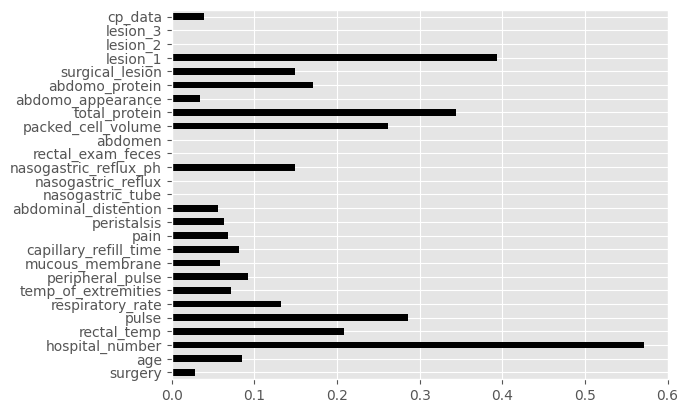

In [22]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
plt.style.use('ggplot')
importance = mutual_info_regression(X,Y)
feature_impor = pd.Series(importance,X.columns[0:len(X.columns)])
feature_impor.plot(kind = 'barh', color = 'black')
plt.show()

In [23]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y, test_size=0.15)

In [24]:
logreg = LogisticRegression()
logreg.fit(Xtrain,Ytrain)

c:\Users\Daniella\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
pred_logreg = logreg.predict(Xtest)
print(classification_report(Ytest,pred_logreg))

              precision    recall  f1-score   support

           0       0.65      0.34      0.45        32
           1       0.39      0.89      0.54        27
           2       0.50      0.05      0.08        22

    accuracy                           0.44        81
   macro avg       0.51      0.43      0.36        81
weighted avg       0.52      0.44      0.38        81



In [32]:
#since the class balancing did not improve the accuracy, next is hyper parameter tuning
#hyper parameter tuning: for logistic regression all parameters are tuned to give 

from sklearn.model_selection import GridSearchCV
para_grid = {'penalty':['l1', 'l2', 'elasticent'],
             'C':[0.001, 0.01, 0.1, 1, 10, 100],
             'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

grid_search = GridSearchCV(estimator=logreg, param_grid=para_grid, cv=5, scoring='accuracy')
grid_search.fit(Xtrain,Ytrain)
print('best parameter found:',grid_search.best_params_)

c:\Users\Daniella\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Daniella\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Daniella\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Daniella\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Daniella\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached w

best parameter found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [36]:
log_reg = LogisticRegression(C=1, penalty='l1', solver='liblinear')

In [37]:
log_reg = LogisticRegression()
log_reg.fit(Xtrain,Ytrain)

c:\Users\Daniella\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
pred_logreg = log_reg.predict(Xtest)
print(classification_report(Ytest,pred_logreg))

              precision    recall  f1-score   support

           0       0.65      0.34      0.45        32
           1       0.39      0.89      0.54        27
           2       0.50      0.05      0.08        22

    accuracy                           0.44        81
   macro avg       0.51      0.43      0.36        81
weighted avg       0.52      0.44      0.38        81

